In [1]:
print('Homework 2, k-means')
print('Student:  Patrick Humphries, 7097-1087-72, pvhumphr@usc.edu')
print('Class:  INF 552 Machine Learning for Data Science')
print('Section:  32458')
print('University of Southern California, Spring 2020')
print(' ')
print('Summary')
print('This program implements the k-means algorithm using')
print('using file "clusters.txt" and the number of clusters set to three.')
print(' ')
print('Instructions')
print('Unzip hw02_humphries.zip into an empty directory.')
print('From a command line, execute "python inf552_assignment_2_humphries_k_means.py".')
print('A series of scatter plots will be displayed.  Cancel the current to see the next.')
print('The distribution of data points and centroid movement will be displayed in the title.')
print(' ')
print('The last plot was created using scikit learn.')
print(' ')
print('Please wait while the first plot is rendered.')
print('\n\n\n')

Homework 2, k-means
Student:  Patrick Humphries, 7097-1087-72, pvhumphr@usc.edu
Class:  INF 552 Machine Learning for Data Science
Section:  32458
University of Southern California, Spring 2020
 
Summary
This program implements the k-means algorithm using
using file "clusters.txt" and the number of clusters set to three.
 
Instructions
Unzip hw02_humphries.zip into an empty directory.
From a command line, execute "python inf552_assignment_2_humphries_k_means.py".
A series of scatter plots will be displayed.  Cancel the current to see the next.
The distribution of data points and centroid movement will be displayed in the title.
 
The last plot was created using scikit learn.
 
Please wait while the first plot is rendered.






In [2]:
# Import libraries.
import csv
import matplotlib.pyplot as plt
from matplotlib import patches
from math import sqrt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# The data set into a list of tuples.
# The data set "clusters.txt" was copied to "custers.csv" with no modifications.
# The resulting X is a list of tuple positions of (x,y).

def load_X(file_name='clusters.csv'):
    X = []
    with open(file_name, newline='') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                row[-1] = row[-1].rstrip()
                X.append((float(row[0]),float(row[1]))) 
      
    # Dump the first five rows for documentation.
    print(' ')
    for i in range(0, 5):
        print(X[i])
    print(' ')
        
    return X

In [4]:
# The clusters are created as far away as possible from other clusters and data points.
# This was done to emphasize movement of centroids.

def create_clusters(K=3):
    C = []
    colors=['red','blue','green','black']
    centroids=[(-8,8),(-8,-8),(8,-8),(8,8)]
    
    for i in range(0,K):
        cluster = {
            "xy":centroids[i],
            "color":colors[i],
            "X":[]
        }
        C.append(cluster)
    
    # Dump C for documentation.
    print(' ')
    for c in C:
        print(c)
    print(' ')
    
    return C

In [5]:
# This calculates the distance between a data point and a centroid of a cluster.

def calc_distance_between_data_points(x, c):
    a = (x[0] - c["xy"][0])**2
    b = (x[1] - c["xy"][1])**2
    return sqrt(a + b)

In [6]:
# Assign data points to closest clusters.

def assign_data_points_to_a_cluster(X, C):
    
    # Reset clusters.
    for c in C:
        c["X"] = []
    
    # Find the closest cluster for each data point.
    for x in X:
        index_of_shortest_distance = 0
        shortest_distance = 99.0
        i = 0
        for c in C:
            distance = calc_distance_between_data_points(x, c)
            
            if distance < shortest_distance:
                shortest_distance = distance
                index_of_shortest_distance = i
                
            i += 1
        
        # Retrieve the closest cluster.
        c = C[index_of_shortest_distance]
        
        # Assign the data point to the closest cluster.
        c["X"].append(x)
        
    return C

In [7]:
# Load data, create clusters, and point the initial state.
# Return X, C, T
# X:  Data points
# C:  Clusters
# T:  Control totals

def initialization():
    
    # Load data.
    X = load_X()
    print('Number of data points:', len(X))

    # Create clusters.
    C = create_clusters()
    print('Number of clusters created:', len(C))
    
    # Create control totals for data points and total centroid movement.
    T = {}
    for c in C:
        color = c["color"]
        T[color] = 0
    T["movement"] = 0
    
    # Plot data points and clusters.
    plot_data_points(X,C,T)
    
    return (X,C,T)

In [8]:
# Assign data points to clusters, calculate centroids, and plot the current state.
# Total movement of centroids is returned.
# Returned is the total of centroid movement.

def realign_data_points(X,C,T):
    
    C = assign_data_points_to_a_cluster(X,C)
    
    total_movement = recalculate_centroids(C,T)
    
    # Update control totals
    for c in C:
        print(c["color"], len(c["X"]))
        color = c["color"]
        T[color] = len(c["X"])
    
    plot_clustering(X,C,T)
    
    return total_movement

In [9]:
# Recalculate the centroids based on the associated data points.
# The total movement of the centroids is returned.

def recalculate_centroids(C,T):
    
    # Intialize the total movement of the centroids.
    total_movement = 0.0
    
    # Sum the members of the cluster.
    for c in C:
        
        # Preserve the current centroid for comparison.
        prior_xy = c["xy"]
    
        # Sum the data points.
        total_X = [0.0, 0.0]
        for x in c["X"]:
            total_X[0] += x[0]
            total_X[1] += x[1]
        
        # Calculate the new centroid.
        n = len(c["X"])
        a = total_X[0]/n
        b = total_X[1]/n
        c["xy"] = (a,b)
        
        # Accumulate movement of all centroids.
        total_movement += calc_distance_between_data_points(prior_xy, c)
        
        # Update control totals.
        T["movement"] = total_movement
        
    print('Total centroid movement: {:.2f}'.format(total_movement))
    
    # Return the total movement of all centroids.
    return round(total_movement, 2)

In [10]:
# This initial visualization displays data points as grey dots, not aligned with a cluster.
# The clusters are displayed in color in their initial positions.
def plot_data_points(X,C,T):

    fig, ax = plt.subplots(subplot_kw={"aspect":"equal"})
    
    # Display control totals in the title.
    s = ' '
    for key in T:
        s += (key + ": " + str(T[key]) + ", ")
    fig.suptitle(s)
    
    # Display data points.
    for xy in X:
        
        circle = patches.Circle(xy,
                                radius=0.2,
                                color="lightgrey")
        
        ax.add_artist(circle)
        
    # Display clusters.
    for c in C:
        
        circle = patches.Circle(c["xy"],
                                radius=1.0,
                                color=c["color"],
                                linewidth=1.0,
                                fill=False,
                                zorder=2.0)
        ax.add_patch(circle)

    # Set axis limits to contain all data points.
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    
    # Showtime.
    plt.show()

In [11]:
# Plot clusters and the associated data points in the color of the cluster.
def plot_clustering(X,C,T):
    
    fig, ax = plt.subplots(subplot_kw={"aspect":"equal"})
    
    # Display control totals in the title.
    T["movement"] = round(T["movement"], 2)
    s = ' '
    for key in T:
        s += (key + ": " + str(T[key]) + ", ")
    fig.suptitle(s)
    
    
    # Plot clusters.
    for c in C:
        
        circle = patches.Circle(c["xy"],
                                radius=1.0,
                                color=c["color"],
                                linewidth=1.0,
                                fill=False,
                                zorder=2.0)
        ax.add_patch(circle)
        
        # Plot data points for the cluster.
        for x in c["X"]:
            circle = patches.Circle(x, 
                                    radius=0.2,
                                    color=c["color"],
                                    linewidth=1.0)
                                    
            ax.add_patch(circle)

    # Set axis to contain all data points.
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    
    # Showtime.
    plt.show()

In [12]:
# Compare to scikit learn.
def call_library():
    # Count members in each cluster.
    kmeans_counts = KMeans(n_clusters=3, random_state=0).fit(X)
    counters = [0] * 3
    for count in kmeans_counts.labels_:
        counters[count] += 1

    # Format title
    s = ' '
    for i in range(0, len(counters)):
        s += 'Counter ' + str(i) + ': ' + str(counters[i]) + '    '

    # Plot the predictions.
    kmeans_predict = KMeans(n_clusters=3, random_state=0).fit_predict(X)
    a = []
    b = []
    for x in X:
        a.append(x[0])
        b.append(x[1])
    plt.scatter(a, b, c=kmeans_predict)
    plt.title(s)
    plt.show()

 
(-1.861331241, -2.991682765)
(-2.17009237, -3.292317782)
(-1.014080969, 0.38579499)
(-2.912942536, -2.579539167)
(0.035720735, -0.799697919)
 
Number of data points: 150
 
{'xy': (-8, 8), 'color': 'red', 'X': []}
{'xy': (-8, -8), 'color': 'blue', 'X': []}
{'xy': (8, -8), 'color': 'green', 'X': []}
 
Number of clusters created: 3


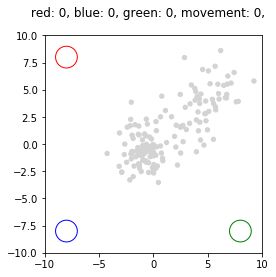

Total centroid movement: 30.41
red 39
blue 50
green 61


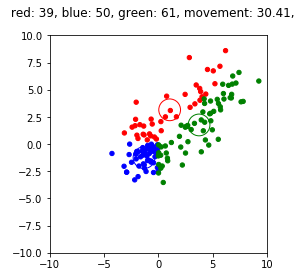

Total centroid movement: 2.84
red 15
blue 79
green 56


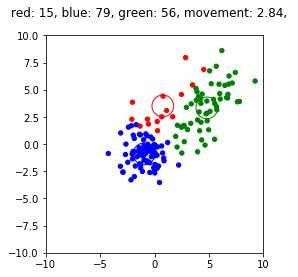

Total centroid movement: 1.46
red 17
blue 82
green 51


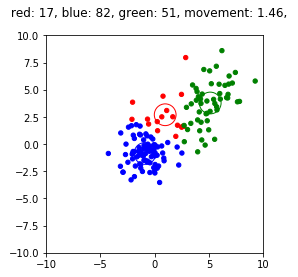

Total centroid movement: 1.24
red 23
blue 81
green 46


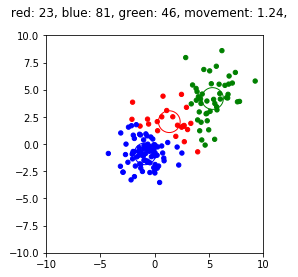

Total centroid movement: 1.16
red 27
blue 80
green 43


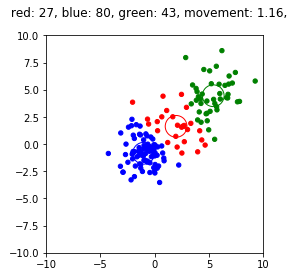

Total centroid movement: 0.66
red 30
blue 80
green 40


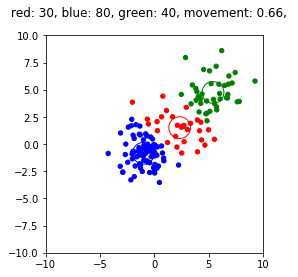

Total centroid movement: 0.50
red 29
blue 82
green 39


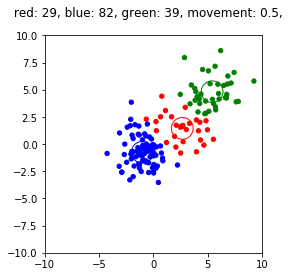

Total centroid movement: 0.38
red 29
blue 83
green 38


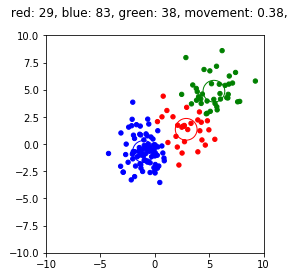

Total centroid movement: 0.00
red 29
blue 83
green 38


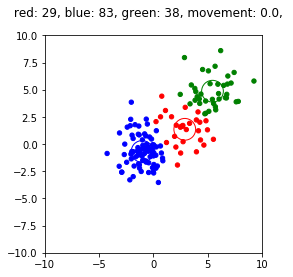

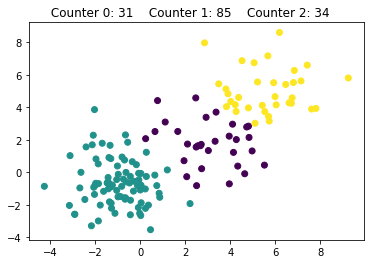

In [13]:
# Main routine.
# Plot the intial state and subsequent states of clusters.
# Stop when there is no further movement of centroids.
# X:  List of data point tuples (x,y).
# C:  List of clusters.

# Load data points, create clusters, and plot the initial state.
X,C,T = initialization()

# Reassign data points to clusters, move centroids, and plot the new state.
for i in range(0,10):
    
    total_movement = realign_data_points(X,C,T)
    
    # Stop if there is relatively no movement of centroids.
    if total_movement < 0.01:
        break

# Plot using scikit library.
call_library()